In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('bank_loan.csv')
data.head()

,Age,Annual_Income_INR,Monthly_Income_INR,Loan_Amount_INR,Loan_Term_Months,Credit_Score,Existing_Loans_Count,Dependents,Employment_Type,Residence_Type,EMI,Loan_Approved
0,59,153267,12772,63224,24,681,0,2,Salaried,Family,2634.333333,0
1,49,2329897,194158,90738,36,831,1,0,Self-Employed,Rented,2520.500000,1
2,35,2074596,172883,992654,240,451,1,3,Self-Employed,Owned,4136.058333,0
3,63,307164,25597,1948739,120,861,1,2,Government,Owned,16239.491667,0
4,28,685626,57135,1279336,60,719,3,0,Self-Employed,Family,21322.266667,0


In [ ]:
# data["Employment_Type"].value_counts()
data.drop(["Employment_Type", "Residence_Type"], axis=1, inplace=True)
data

,Age,Annual_Income_INR,Monthly_Income_INR,Loan_Amount_INR,Loan_Term_Months,Credit_Score,Existing_Loans_Count,Dependents,EMI,Loan_Approved
0,59,153267,12772,63224,24,681,0,2,2634.333333,0
1,49,2329897,194158,90738,36,831,1,0,2520.500000,1
2,35,2074596,172883,992654,240,451,1,3,4136.058333,0
3,63,307164,25597,1948739,120,861,1,2,16239.491667,0
4,28,685626,57135,1279336,60,719,3,0,21322.266667,0
...,...,...,...,...,...,...,...,...,...,...
495,46,618276,51523,1160241,48,428,3,0,24171.687500,0
496,30,1164920,97076,1345160,60,429,5,2,22419.333333,0
497,46,2304697,192058,1215529,48,871,5,4,25323.520833,0
498,54,661411,55117,526072,48,859,5,2,10959.833333,0


In [11]:
x = data.drop("Loan_Approved", axis=1)
y = data["Loan_Approved"]


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [13]:
y_pred = model.predict(x_test)
print("Model Accuracy = ", accuracy_score(y_test, y_pred))

Model Accuracy =  0.94


In [18]:
#new cust as per data.coloumns
new_cust = pd.DataFrame({
    'Age': [30],
    'Annual_Income_INR': [60000],
    'Monthly_Income_INR': [5000],
    'Loan_Amount_INR': [200000],
    'Loan_Term_Months': [60],
    'Credit_Score': [700],
    'Existing_Loans_Count': [1],
    'Dependents': [2],
    'EMI': [4000]

})
new_cust_pred = model.predict(new_cust)
print("New Customer Loan Approval Prediction (0: Not Approved, 1: Approved) = ", new_cust_pred[0])

New Customer Loan Approval Prediction (0: Not Approved, 1: Approved) =  0


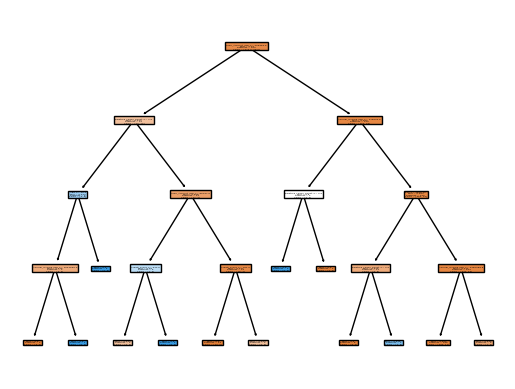

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plot_tree(model,filled=True,feature_names=x.columns)
plt.show()
